In [1]:
import pandas as pd
import json
from ast import literal_eval
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning

## Importing raw messy datasets having json columns 

In [2]:
df = pd.read_csv('movies_metadata.csv')

C:\Users\Ansh\AppData\Local\Temp\ipykernel_10576\2089594497.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('movies_metadata.csv')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [89]:
df.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


In [4]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


## Extracting desired values from json columns

Cleaning collection names

In [5]:
df['belongs_to_collection'] = df['belongs_to_collection'].fillna('[]').apply(literal_eval).apply(
                                                                        lambda x : x['name'] if isinstance(x,dict) else np.nan)

In [6]:
df['belongs_to_collection'][0]

'Toy Story Collection'

Cleaning genres names

In [7]:
df['genres'] = df['genres'].fillna('[]').apply(literal_eval).apply(
                                                lambda x : "|".join(i['name'] for i in x) if  isinstance(x,list) else np.nan) 

In [8]:
df['genres'][0]

'Animation|Comedy|Family'

Cleaning spoken languages

In [9]:
df['spoken_languages'] = df['spoken_languages'].fillna('[]').apply(literal_eval).apply(
                                                lambda x : "|".join(i['name'] for i in x) if  isinstance(x,list) else np.nan) 

In [10]:
df['spoken_languages'][0]

'English'

Cleaning production companies 

In [11]:
df['production_companies'] = df['production_companies'].fillna('[]').apply(literal_eval).apply(
                                                lambda x : "|".join(i['name'] for i in x) if isinstance(x,list) else np.nan)

In [12]:
df['production_companies'][0]

'Pixar Animation Studios'

Cleaning Production countries

In [13]:
df['production_countries'] = df['production_countries'].fillna('[]').apply(literal_eval).apply(
                                                lambda x : "|".join(i['name'] for i in x) if isinstance(x,list) else np.nan)

In [14]:
df['production_countries'][0]

'United States of America'

In [15]:
df = df.drop(columns=['original_title','imdb_id','video','homepage'])

Updated df

In [16]:
df.head()

,adult,belongs_to_collection,budget,genres,id,original_language,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,False,Toy Story Collection,30000000,Animation|Comedy|Family,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,Pixar Animation Studios,United States of America,1995-10-30,373554033.0,81.0,English,Released,NaN,Toy Story,7.7,5415.0
1,False,NaN,65000000,Adventure|Fantasy|Family,8844,en,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,TriStar Pictures|Teitler Film|Interscope Commu...,United States of America,1995-12-15,262797249.0,104.0,English|Français,Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0
2,False,Grumpy Old Men Collection,0,Romance|Comedy,15602,en,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,Warner Bros.|Lancaster Gate,United States of America,1995-12-22,0.0,101.0,English,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0
3,False,NaN,16000000,Comedy|Drama|Romance,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,Twentieth Century Fox Film Corporation,United States of America,1995-12-22,81452156.0,127.0,English,Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0
4,False,Father of the Bride Collection,0,Comedy,11862,en,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,Sandollar Productions|Touchstone Pictures,United States of America,1995-02-10,76578911.0,106.0,English,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0


## Importing Credits dataset

In [17]:
credits = pd.read_csv('Credits.csv')

In [18]:
credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


## Cleaning 'Cast' column to get cast names and cast size

Extracting cast names

In [19]:
credits['cast'] = credits['cast'].fillna('[]').apply(literal_eval).apply(
                    lambda x : '|'.join(i['name'] for i in x) if isinstance(x,list) else np.nan) 

In [20]:
credits['cast'][0]

'Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wallace Shawn|John Ratzenberger|Annie Potts|John Morris|Erik von Detten|Laurie Metcalf|R. Lee Ermey|Sarah Freeman|Penn Jillette'

Extracting cast size

In [21]:
def size(x):
    
    count = 1
    for i in x:
        if i == "|":
            count = count+1
    return count

In [22]:
credits['cast_size'] = credits['cast'].apply(size)

In [23]:
credits['cast_size']

0        13
1        26
2         7
3        10
4        12
         ..
45471     3
45472    11
45473    15
45474     5
45475     1
Name: cast_size, Length: 45476, dtype: int64

## Transforming 'Crew' column

### Making a new column 'Director' - extract only those names from crew who are directors

In [24]:
credits['director'] = credits['crew'].fillna('[]').apply(literal_eval).apply( 
                        lambda x : '|'.join(i['name'] for i in x if i['job'] == "Director") if isinstance(x,list) else np.nan)

In [25]:
credits['director']

0           John Lasseter
1            Joe Johnston
2           Howard Deutch
3         Forest Whitaker
4           Charles Shyer
               ...       
45471    Hamid Nematollah
45472            Lav Diaz
45473      Mark L. Lester
45474    Yakov Protazanov
45475       Daisy Asquith
Name: director, Length: 45476, dtype: object

### Dropping the duplicates from credits table

In [26]:
credits = credits.drop_duplicates(subset = ['id'])

Dropping the irrelevant columns

In [27]:
credits = credits.drop(columns=['crew'])

In [28]:
credits['id'] = credits['id'].astype(str)

In [29]:
credits.head()

,cast,id,cast_size,director
0,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,862,13,John Lasseter
1,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,8844,26,Joe Johnston
2,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...,15602,7,Howard Deutch
3,Whitney Houston|Angela Bassett|Loretta Devine|...,31357,10,Forest Whitaker
4,Steve Martin|Diane Keaton|Martin Short|Kimberl...,11862,12,Charles Shyer


## Joining this credits dataset with the main movies dataset

In [30]:
df_new = df.merge(credits, how='left', on='id')

In [31]:
df_new.head()

,adult,belongs_to_collection,budget,genres,id,original_language,overview,popularity,poster_path,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,cast_size,director
0,False,Toy Story Collection,30000000,Animation|Comedy|Family,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,Pixar Animation Studios,...,81.0,English,Released,NaN,Toy Story,7.7,5415.0,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,13.0,John Lasseter
1,False,NaN,65000000,Adventure|Fantasy|Family,8844,en,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,TriStar Pictures|Teitler Film|Interscope Commu...,...,104.0,English|Français,Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,26.0,Joe Johnston
2,False,Grumpy Old Men Collection,0,Romance|Comedy,15602,en,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,Warner Bros.|Lancaster Gate,...,101.0,English,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...,7.0,Howard Deutch
3,False,NaN,16000000,Comedy|Drama|Romance,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,Twentieth Century Fox Film Corporation,...,127.0,English,Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,Whitney Houston|Angela Bassett|Loretta Devine|...,10.0,Forest Whitaker
4,False,Father of the Bride Collection,0,Comedy,11862,en,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,Sandollar Productions|Touchstone Pictures,...,106.0,English,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,Steve Martin|Diane Keaton|Martin Short|Kimberl...,12.0,Charles Shyer


Reindexing the df

In [32]:
df_new = df_new.reindex(columns = ['id', 'title', 'tagline', 'release_date', 'genres',
       'belongs_to_collection', 'original_language', 'budget_musd',
       'revenue_musd', 'production_companies', 'production_countries',
       'vote_count', 'vote_average', 'popularity', 'runtime', 'overview',
       'spoken_languages', 'poster_path', 'cast', 'cast_size',
       'director'])

In [33]:
df_new.head()

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,...,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,director
0,862,Toy Story,NaN,1995-10-30,Animation|Comedy|Family,Toy Story Collection,en,NaN,NaN,Pixar Animation Studios,...,5415.0,7.7,21.946943,81.0,"Led by Woody, Andy's toys live happily in his ...",English,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,13.0,John Lasseter
1,8844,Jumanji,Roll the dice and unleash the excitement!,1995-12-15,Adventure|Fantasy|Family,NaN,en,NaN,NaN,TriStar Pictures|Teitler Film|Interscope Commu...,...,2413.0,6.9,17.015539,104.0,When siblings Judy and Peter discover an encha...,English|Français,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,26.0,Joe Johnston
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,1995-12-22,Romance|Comedy,Grumpy Old Men Collection,en,NaN,NaN,Warner Bros.|Lancaster Gate,...,92.0,6.5,11.7129,101.0,A family wedding reignites the ancient feud be...,English,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...,7.0,Howard Deutch
3,31357,Waiting to Exhale,Friends are the people who let you be yourself...,1995-12-22,Comedy|Drama|Romance,NaN,en,NaN,NaN,Twentieth Century Fox Film Corporation,...,34.0,6.1,3.859495,127.0,"Cheated on, mistreated and stepped on, the wom...",English,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,Whitney Houston|Angela Bassett|Loretta Devine|...,10.0,Forest Whitaker
4,11862,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,1995-02-10,Comedy,Father of the Bride Collection,en,NaN,NaN,Sandollar Productions|Touchstone Pictures,...,173.0,5.7,8.387519,106.0,Just when George Banks has recovered from his ...,English,/e64sOI48hQXyru7naBFyssKFxVd.jpg,Steve Martin|Diane Keaton|Martin Short|Kimberl...,12.0,Charles Shyer


## Loading this cleaned dataset into SQL database

In [ ]:
from sqlalchemy import create_engine
import pymysql

In [ ]:
my_engine = create_engine('mysql+pymysql://root:*******************') #Confidential Information 

In [ ]:
df.to_sql(
        name = 'movies_dataset',
        index = False,
        con = my_engine,
        if_exists = 'replace')

## ###########################################################################

# Data Analysis

### Importing the cleaned dataset from SQL database for analysis

In [ ]:
my_con = pymysql.connect(
            host = 'localhost',
            user = 'root',
            password = ********,
            database = ********,) # Confidential Information 

In [ ]:
query = "select * from movies_dataset"

In [37]:
dff = pd.read_sql_query(query,my_con)

In [38]:
dff = pd.read_csv('movies_complete.csv')

In [39]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     44691 non-null  int64  
 1   title                  44691 non-null  object 
 2   tagline                20284 non-null  object 
 3   release_date           44657 non-null  object 
 4   genres                 42586 non-null  object 
 5   belongs_to_collection  4463 non-null   object 
 6   original_language      44681 non-null  object 
 7   budget_musd            8854 non-null   float64
 8   revenue_musd           7385 non-null   float64
 9   production_companies   33356 non-null  object 
 10  production_countries   38835 non-null  object 
 11  vote_count             44691 non-null  int64  
 12  vote_average           42077 non-null  float64
 13  popularity             44691 non-null  float64
 14  runtime                43179 non-null  float64
 15  ov

In [40]:
dff.head()

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,...,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,director
0,862,Toy Story,NaN,10/30/1995,Animation|Comedy|Family,Toy Story Collection,en,30.0,373.554033,Pixar Animation Studios,...,5415,7.7,21.946943,81.0,"Led by Woody, Andy's toys live happily in his ...",English,<img src='http://image.tmdb.org/t/p/w185//rhIR...,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,13,John Lasseter
1,8844,Jumanji,Roll the dice and unleash the excitement!,12/15/1995,Adventure|Fantasy|Family,NaN,en,65.0,262.797249,TriStar Pictures|Teitler Film|Interscope Commu...,...,2413,6.9,17.015539,104.0,When siblings Judy and Peter discover an encha...,English|Français,<img src='http://image.tmdb.org/t/p/w185//vzmL...,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,26,Joe Johnston
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,12/22/1995,Romance|Comedy,Grumpy Old Men Collection,en,NaN,NaN,Warner Bros.|Lancaster Gate,...,92,6.5,11.712900,101.0,A family wedding reignites the ancient feud be...,English,<img src='http://image.tmdb.org/t/p/w185//6ksm...,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...,7,Howard Deutch
3,31357,Waiting to Exhale,Friends are the people who let you be yourself...,12/22/1995,Comedy|Drama|Romance,NaN,en,16.0,81.452156,Twentieth Century Fox Film Corporation,...,34,6.1,3.859495,127.0,"Cheated on, mistreated and stepped on, the wom...",English,<img src='http://image.tmdb.org/t/p/w185//16XO...,Whitney Houston|Angela Bassett|Loretta Devine|...,10,Forest Whitaker
4,11862,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,2/10/1995,Comedy,Father of the Bride Collection,en,NaN,76.578911,Sandollar Productions|Touchstone Pictures,...,173,5.7,8.387519,106.0,Just when George Banks has recovered from his ...,English,<img src='http://image.tmdb.org/t/p/w185//e64s...,Steve Martin|Diane Keaton|Martin Short|Kimberl...,12,Charles Shyer


In [41]:
dff.describe()

,id,budget_musd,revenue_musd,vote_count,vote_average,popularity,runtime,cast_size
count,44691.000000,8854.000000,7385.000000,44691.000000,42077.000000,44691.000000,43179.000000,44691.000000
mean,107186.242845,21.669886,68.968649,111.653778,6.003341,2.957460,97.566850,12.479090
std,111806.362236,34.359837,146.608966,495.322313,1.281060,6.040008,34.653409,12.124663
min,2.000000,0.000001,0.000001,0.000000,0.000000,0.000000,1.000000,0.000000
25%,26033.500000,2.000000,2.405420,3.000000,5.300000,0.402038,86.000000,6.000000
50%,59110.000000,8.200000,16.872671,10.000000,6.100000,1.150055,95.000000,10.000000
75%,154251.000000,25.000000,67.642693,35.000000,6.800000,3.768882,107.000000,15.000000
max,469172.000000,380.000000,2787.965087,14075.000000,10.000000,547.488298,1256.000000,313.000000


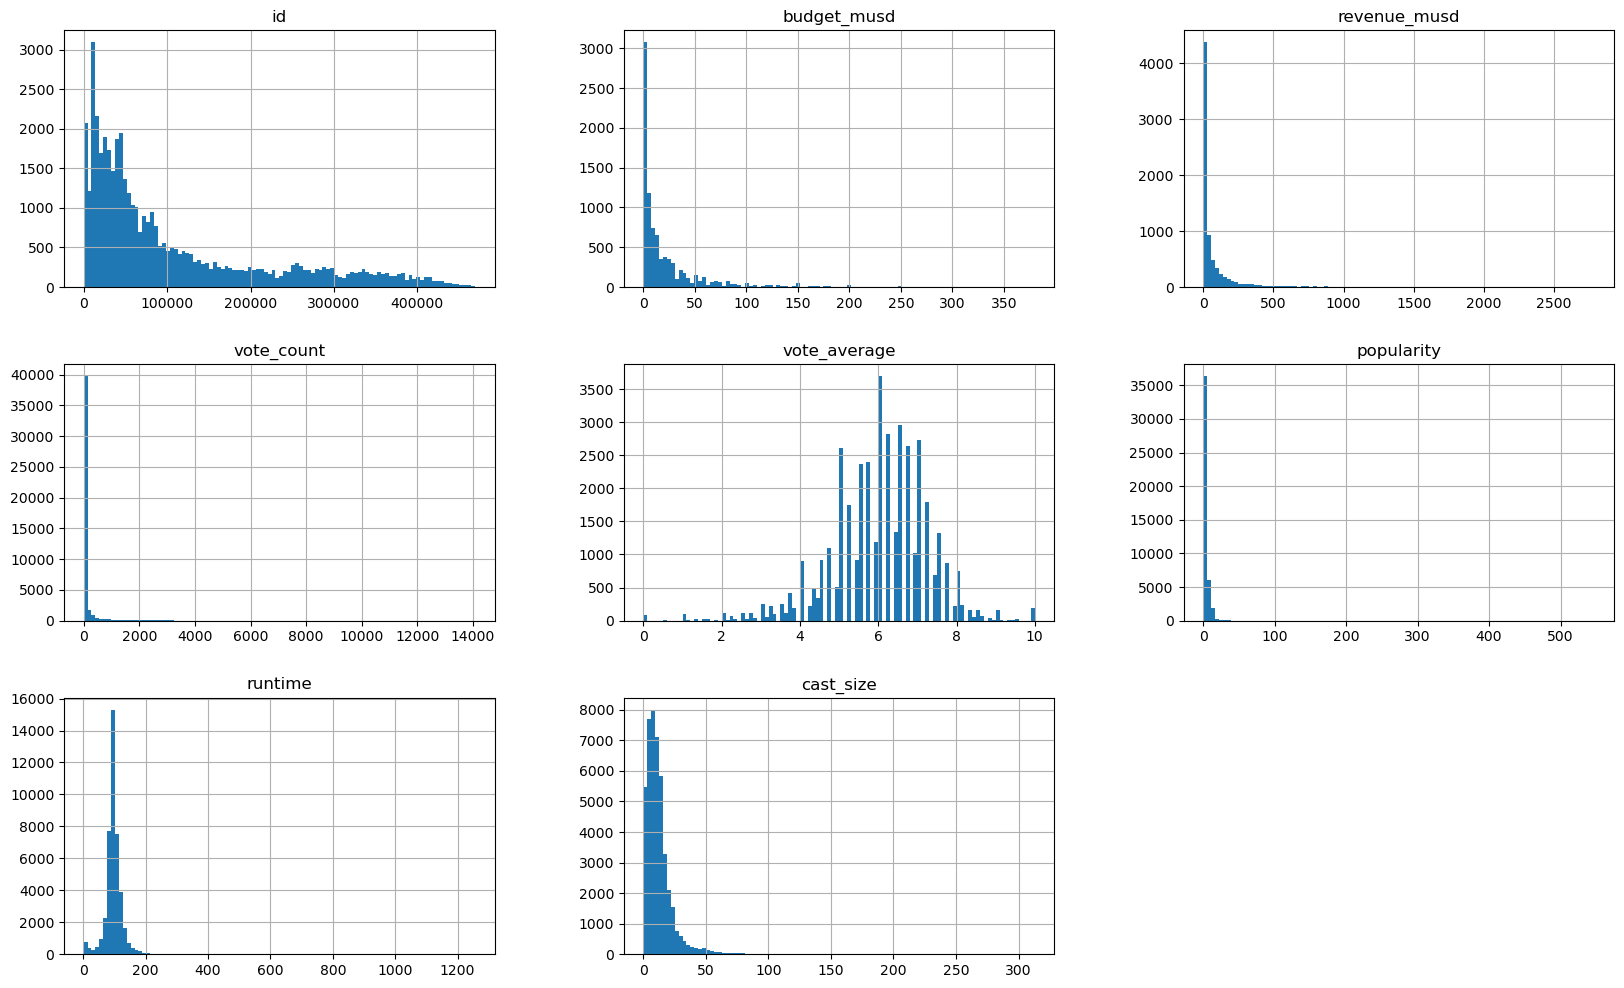

In [42]:
dff.hist(figsize = (20, 12), bins = 100)
plt.show()

__Trend of number of movies__

In [82]:
dff['release_date'] = pd.to_datetime(dff['release_date'])
dff['year'] = dff['release_date'].apply(lambda x : x.year)

<AxesSubplot:xlabel='year'>

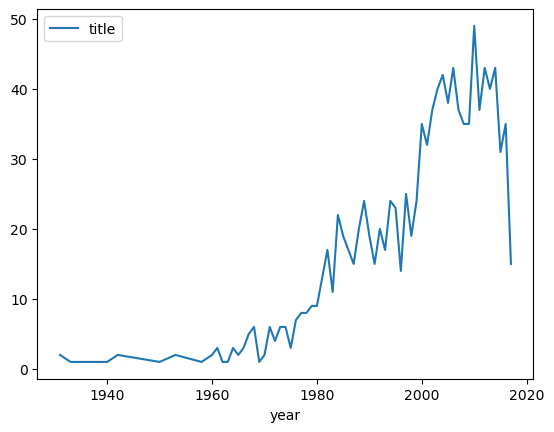

In [88]:
dff.groupby('year').agg({'title':'count'}).plot()

__Top 5 Movies - Highest Revenue__

In [43]:
d1 = dff[['title','revenue_musd']]
d1.sort_values('revenue_musd', ascending = False).iloc[0:5,].set_index('title')

,revenue_musd
title,
Avatar,2787.965087
Star Wars: The Force Awakens,2068.223624
Titanic,1845.034188
The Avengers,1519.557910
Jurassic World,1513.528810


__Compare the top 5 Movies with their Budget__

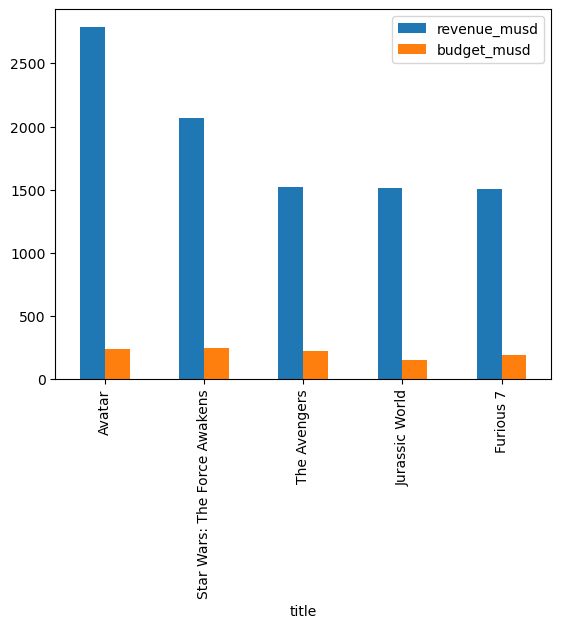

In [79]:
d1 = dff.groupby('title').agg({'revenue_musd':'max','budget_musd':'max'}).sort_values('revenue_musd',ascending=False).head(5).plot.bar()

__Top 5 Movies - Highest ROI__

In [45]:
dff['profit'] = dff['revenue_musd']-dff['budget_musd']

<AxesSubplot:xlabel='profit', ylabel='title'>

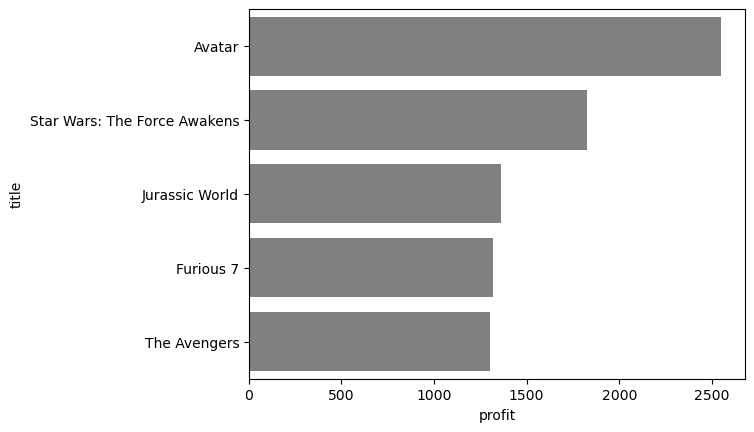

In [74]:
d1 = dff.sort_values('profit', ascending = False).iloc[0:5,]
d1 = d1[['title','profit','revenue_musd']]
sns.barplot(x = 'profit', y='title', data = d1, color = 'grey')

__Top 5 Movies - Highest Rating (Consider atleast 50 vote counts)__

In [47]:
d1 = dff[dff['vote_count']>=50].sort_values('vote_average', ascending = False).iloc[0:5,]
d1[['title','vote_average']].set_index('title')

,vote_average
title,
Planet Earth II,9.5
Dilwale Dulhania Le Jayenge,9.1
Planet Earth,8.8
Sansho the Bailiff,8.7
The Jinx: The Life and Deaths of Robert Durst,8.6


## Movies Searches

__Search 1: Most Successful Pixar Studio Movies between 2010 and 2015 (high Revenue)__

In [48]:
dff = dff.dropna()
dff_slice = dff[dff['production_companies'].str.contains('Pixar')]

In [49]:
dff_slice['release_date'] = pd.to_datetime(dff_slice['release_date'])

C:\Users\Ansh\AppData\Local\Temp\ipykernel_10576\984972132.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff_slice['release_date'] = pd.to_datetime(dff_slice['release_date'])


In [50]:
d1 = dff_slice[dff_slice['release_date'].between('2010-01-01','2015-12-31')].sort_values('revenue_musd',ascending=False)
d1[['title','genres','revenue_musd']].set_index('title')

,genres,revenue_musd
title,,
Toy Story 3,Animation|Family|Comedy,1066.969703
Monsters University,Animation|Family,743.559607
Cars 2,Animation|Family|Adventure|Comedy,559.852396


__Search 2: Action or Thriller Movie with original language English and minimum Rating of 7.5 (most recent)__

In [51]:
dff_slice = dff[(dff['genres'].str.contains('Action')) | dff['genres'].str.contains('Thriller')]

In [52]:
dff_slice = dff_slice[(dff_slice['original_language']=='en') & (dff_slice['vote_average'] >= 7.5)]

In [53]:
dff_slice.set_index('title')

,id,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,...,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,director,profit
title,,,,,,,,,,,,,,,,,,,,,
Star Wars,11,"A long time ago in a galaxy far, far away...",5/25/1977,Adventure|Action|Science Fiction,Star Wars Collection,en,11.000000,775.398007,Lucasfilm|Twentieth Century Fox Film Corporation,United States of America,...,8.1,42.149697,121.0,Princess Leia is captured and held hostage by ...,English,<img src='http://image.tmdb.org/t/p/w185//btTd...,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,106,George Lucas,764.398007
Blade Runner,78,Man has made his match... now it's his problem.,6/25/1982,Science Fiction|Drama|Thriller,Blade Runner Collection,en,28.000000,33.139618,Shaw Brothers|Warner Bros.|The Ladd Company,United States of America|Hong Kong|United Kingdom,...,7.9,96.272374,117.0,In the smog-choked dystopian Los Angeles of 20...,English|Deutsch|广州话 / 廣州話|日本語|Magyar,<img src='http://image.tmdb.org/t/p/w185//p64T...,Harrison Ford|Rutger Hauer|Sean Young|Edward J...,31,Ridley Scott,5.139618
Terminator 2: Judgment Day,280,It's nothing personal.,7/1/1991,Action|Thriller|Science Fiction,The Terminator Collection,en,100.000000,520.000000,Lightstorm Entertainment|Pacific Western|Canal...,France|United States of America,...,7.7,22.661695,137.0,Nearly 10 years have passed since Sarah Connor...,English|Español,<img src='http://image.tmdb.org/t/p/w185//2y4d...,Arnold Schwarzenegger|Linda Hamilton|Robert Pa...,42,James Cameron,420.000000
The Silence of the Lambs,274,To enter the mind of a killer she must challen...,2/1/1991,Crime|Drama|Thriller,The Hannibal Lecter Anthology,en,19.000000,272.742922,Orion Pictures|Strong Heart/Demme Production,United States of America,...,8.1,4.307222,119.0,"FBI trainee, Clarice Starling ventures into a ...",English,<img src='http://image.tmdb.org/t/p/w185//qjAy...,Jodie Foster|Anthony Hopkins|Scott Glenn|Ted L...,60,Jonathan Demme,253.742922
Die Hard,562,40 Stories. Twelve Terrorists. One Cop.,7/15/1988,Action|Thriller,Die Hard Collection,en,28.000000,140.767956,Twentieth Century Fox Film Corporation|Gordon ...,United States of America,...,7.5,16.640522,131.0,"NYPD cop, John McClane's plan to reconcile wit...",English|Deutsch|Italiano,<img src='http://image.tmdb.org/t/p/w185//r7CD...,Bruce Willis|Alan Rickman|Alexander Godunov|Bo...,47,John McTiernan,112.767956
The Empire Strikes Back,1891,The Adventure Continues...,5/17/1980,Adventure|Action|Science Fiction,Star Wars Collection,en,18.000000,538.400000,Lucasfilm|Twentieth Century Fox Film Corporation,United States of America,...,8.2,19.470959,124.0,"The epic saga continues as Luke Skywalker, in ...",English,<img src='http://image.tmdb.org/t/p/w185//6u1f...,Mark Hamill|Harrison Ford|Carrie Fisher|Billy ...,76,Irvin Kershner,520.400000
Raiders of the Lost Ark,85,Indiana Jones - the new hero from the creators...,6/12/1981,Adventure|Action,Indiana Jones Collection,en,18.000000,389.925971,Lucasfilm|Paramount Pictures,United States of America,...,7.7,19.901576,115.0,When Dr. Indiana Jones – the tweed-suited prof...,English|Español|Deutsch|עִבְרִית|العربية|,<img src='http://image.tmdb.org/t/p/w185//44sK...,Harrison Ford|Karen Allen|Paul Freeman|Ronald ...,50,Steven Spielberg,371.925971
Aliens,679,This Time It's War,7/18/1986,Horror|Action|Thriller|Science Fiction,Alien Collection,en,18.500000,183.316455,Twentieth Century Fox Film Corporation|SLM Pro...,United Kingdom|United States of America,...,7.7,21.761179,137.0,When Ripley's lifepod is found by a salvage cr...,English,<img src='http://image.tmdb.org/t/p/w185//nORM...,Sigourney Weaver|Michael Biehn|James Remar|Pau...,26,James Cameron,164.816455
Return of the Jedi,1892,The Empire Falls...,5/23/1983,Adventure|Action|Science Fiction,Star Wars Collection,en,32.350000,572.700000,Lucasfilm|Twentieth Century Fox Film Corporation,United Sta

## Most Successful Directors

__By Number of Movies__

In [54]:
dff.groupby('director').agg({'title':'count'}).sort_values('title',ascending=False).iloc[0:10,]

,title
director,
Robert Rodriguez,11
Sylvester Stallone,7
George Miller,7
Steven Spielberg,7
Paul W.S. Anderson,7
Wes Craven,7
Michael Bay,7
Tim Story,6
George A. Romero,6


__By Revenue__

<AxesSubplot:xlabel='revenue_musd', ylabel='director'>

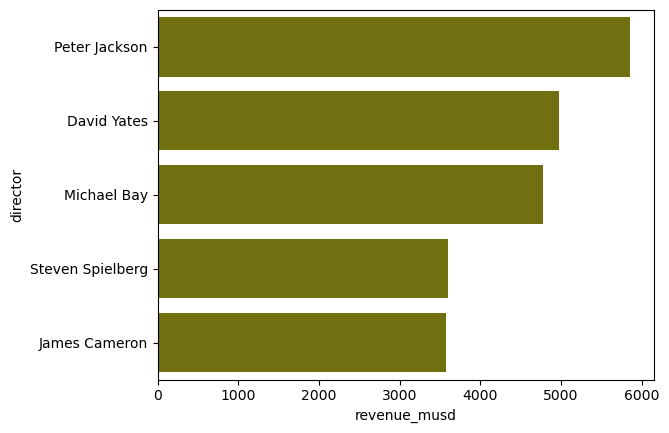

In [55]:
d1 = dff.groupby('director').agg({'revenue_musd':'sum'}).sort_values('revenue_musd',ascending=False).iloc[0:5,]
d1 = d1.reset_index()
sns.barplot(x='revenue_musd', y='director', data=d1, color='olive')

## Most Successful Franchises

In [56]:
d1 = dff.groupby('belongs_to_collection').agg({'title':'count','revenue_musd':'sum','vote_average':'mean'}).iloc[0:10,]

__By Number of Movies__

In [57]:
d1.sort_values('title',ascending=False)

,title,revenue_musd,vote_average
belongs_to_collection,,,
... Has Fallen Collection,2,366.780087,6.00
101 Dalmatians (Live-Action) Collection,2,504.301065,5.35
28 Days/Weeks Later Collection,2,146.958325,6.80
300 Collection,2,760.190470,6.55
48 Hrs. Collection,2,232.387482,6.15
101 Dalmatians (Animated) Collection,1,215.880014,6.80
12 Rounds Collection,1,17.280326,5.70
30 Days of Night Collection,1,75.505973,6.20
8MM Collection,1,96.618699,6.10


__By Revenue__

In [58]:
d1.sort_values('revenue_musd',ascending=False)

,title,revenue_musd,vote_average
belongs_to_collection,,,
300 Collection,2,760.190470,6.55
101 Dalmatians (Live-Action) Collection,2,504.301065,5.35
... Has Fallen Collection,2,366.780087,6.00
48 Hrs. Collection,2,232.387482,6.15
101 Dalmatians (Animated) Collection,1,215.880014,6.80
28 Days/Weeks Later Collection,2,146.958325,6.80
8MM Collection,1,96.618699,6.10
30 Days of Night Collection,1,75.505973,6.20
12 Rounds Collection,1,17.280326,5.70


__By rating__

In [59]:
d1.sort_values('vote_average',ascending=False)

,title,revenue_musd,vote_average
belongs_to_collection,,,
101 Dalmatians (Animated) Collection,1,215.880014,6.80
28 Days/Weeks Later Collection,2,146.958325,6.80
300 Collection,2,760.190470,6.55
30 Days of Night Collection,1,75.505973,6.20
48 Hrs. Collection,2,232.387482,6.15
8MM Collection,1,96.618699,6.10
... Has Fallen Collection,2,366.780087,6.00
9½ Weeks Collection,1,6.735922,5.80
12 Rounds Collection,1,17.280326,5.70


## What are the most common Words in Movie Taglines?

In [63]:
from wordcloud import WordCloud

In [60]:
dff['tagline']

9                     No limits. No fears. No substitutes.
18                 New animals. New adventures. Same hair.
20       The mob is tough, but it’s nothing like show b...
33                           A little pig goes a long way.
43        Nothing In This World Has Prepared You For This.
                               ...                        
42562                                       Family no more
42600             From this moment, everything will change
43294                                          Oh brother.
43549             For freedom. For family. For the planet.
44095           For one world to live, the other must die.
Name: tagline, Length: 1131, dtype: object

In [61]:
tagline_text = ','.join(dff['tagline'])

In [62]:
tagline_text

'No limits. No fears. No substitutes.,New animals. New adventures. Same hair.,The mob is tough, but it’s nothing like show business.,A little pig goes a long way.,Nothing In This World Has Prepared You For This.,An American legend comes to life.,A lot can go down between thursday and saturday...,One night is all that stands between them and freedom. But it\'s going to be a hell of a night.,The last scream you hear will be your own.,Whatcha gonna do?,Courage now, truth always...,Welcome to the planet Brooklyn.,Get an afterlife,When the smoke clears, it just means he\'s reloading.,Think fast. Look alive. Die hard.,The Power Is On!,No driver\'s license, no credit cards, no passport, no access to her bank accounts in a foreign country ... She finds her identity stolen.,On ancient ground, at the edge of the world, an evil born in heaven is about to be unleashed on earth.,Beyond your wildest dreams. Beyond your wildest fantasies.,Where there\'s smoke... there\'s laughter!,Our time is up.,Las

In [64]:
tagline_wrdcld = WordCloud(background_color='white', height=2000, width=4000, max_words= 200).generate(tagline_text)

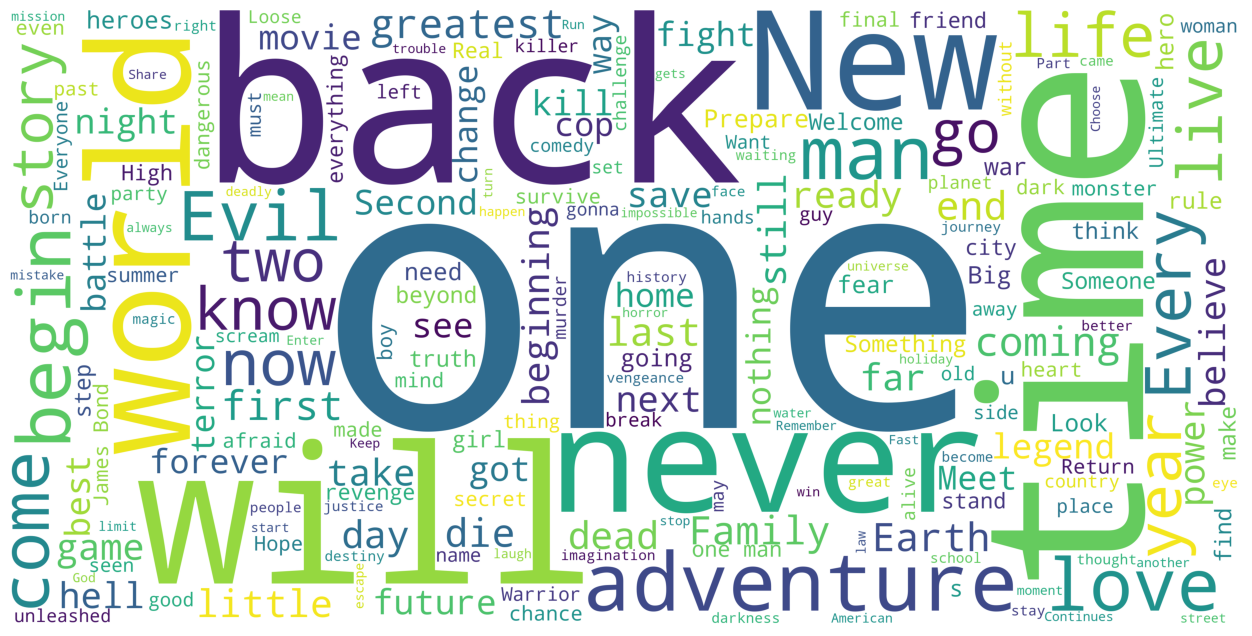

In [67]:
plt.figure(figsize=(16,8))
plt.imshow(tagline_wrdcld)
plt.axis('off')
plt.show()

__-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__